In [1]:
import os
import platform
import subprocess
import numpy as np
import matplotlib.pyplot as plt
import re

In [2]:
base_windows = "C:\\Users\\Miguel\\Downloads" # windows
base_linux = '/home/miguel/dev/dedup/data' # linux

os_name = platform.system()
base_path = base_windows if os_name == "Windows" else base_linux

folders = []
obj = os.scandir(base_path)
print("Files and Directories in '% s':" % base_path)
for entry in obj :
    if entry.is_dir() or entry.is_file():
        folders.append(entry.name)

Files and Directories in '/home/miguel/dev/dedup/data':


In [54]:
class FastCDCScanResponse:
    def __init__(self, files, chunk_min, chunk_avg, chunk_max, unique_chunks, total_data, dupe_data, dedupe_ratio, throughput, throughput_unit):
        self.files = files
        self.chunk_min = chunk_min
        self.chunk_avg = chunk_avg
        self.chunk_max = chunk_max
        self.unique_chunks = unique_chunks
        self.total_data = total_data
        self.dupe_data = dupe_data
        self.dedupe_ratio = dedupe_ratio
        self.throughput = throughput
        self.throughput_unit = throughput_unit
        
def processFastCDCScanResponse(response):
    r = list(filter(None, re.split('\s|\n', response)))
    if len(r) == 30:
        obj = FastCDCScanResponse(r[1], r[5], r[8], r[11], r[14], r[17], r[21], r[25], r[28], r[29])
        return obj
    return None
    

In [55]:
def processFoldersbyChunk(folders, chunk_min, chunk_avg, chunk_max):
    responses = []
    for folder in folders:
        print("Processing Folder: " + str(folder))

        command = "fastcdc scan " + base_path + "/" + str(folder) + " -r -mi " + str(chunk_min) + " -s "+ str(chunk_avg) + " -ma " + str(chunk_max)
        output = subprocess.check_output(command, shell=True).decode('utf-8')
        response = processFastCDCScanResponse(output)
        if response:
            responses.append(response)

        #print(output)
    #print(responses)
    return responses

In [67]:
num_tests = 10
curr_chunk_size = 4096
tests = {}
for i in range(1, num_tests + 1):
    print("\nTest: " + str(i) + " Chunk Size: " + str(curr_chunk_size))
    tests[curr_chunk_size] = processFoldersbyChunk(folders, curr_chunk_size, curr_chunk_size, curr_chunk_size)
    curr_chunk_size *= 2
#print(tests)


Test: 1 Chunk Size: 4096
Processing Folder: files
Processing Folder: videos
Processing Folder: textbooks
Processing Folder: images
Processing Folder: compression
Processing Folder: comp-images-zip
Processing Folder: comp-videos-zip

Test: 2 Chunk Size: 8192
Processing Folder: files
Processing Folder: videos
Processing Folder: textbooks
Processing Folder: images
Processing Folder: compression
Processing Folder: comp-images-zip
Processing Folder: comp-videos-zip

Test: 3 Chunk Size: 16384
Processing Folder: files
Processing Folder: videos
Processing Folder: textbooks
Processing Folder: images
Processing Folder: compression
Processing Folder: comp-images-zip
Processing Folder: comp-videos-zip

Test: 4 Chunk Size: 32768
Processing Folder: files
Processing Folder: videos
Processing Folder: textbooks
Processing Folder: images
Processing Folder: compression
Processing Folder: comp-images-zip
Processing Folder: comp-videos-zip

Test: 5 Chunk Size: 65536
Processing Folder: files
Processing Fol

In [68]:
dedeup_ratios = {}
o = []
for chunk_size in tests.keys():
    j = []
    for folder in tests[chunk_size]:
        d = folder.dedupe_ratio
        j.append(float(d))
    o.append(j)
a = np.array(o)
a

array([[5.0e+01, 0.0e+00, 1.0e-02, 1.8e-01, 0.0e+00, 9.0e-02, 2.0e-02],
       [5.0e+01, 0.0e+00, 0.0e+00, 1.8e-01, 0.0e+00, 9.0e-02, 0.0e+00],
       [5.0e+01, 0.0e+00, 0.0e+00, 1.8e-01, 0.0e+00, 9.0e-02, 0.0e+00],
       [5.0e+01, 0.0e+00, 0.0e+00, 1.7e-01, 0.0e+00, 9.0e-02, 0.0e+00],
       [5.0e+01, 0.0e+00, 0.0e+00, 1.5e-01, 0.0e+00, 8.0e-02, 0.0e+00],
       [5.0e+01, 0.0e+00, 0.0e+00, 1.5e-01, 0.0e+00, 9.0e-02, 0.0e+00],
       [5.0e+01, 0.0e+00, 0.0e+00, 1.8e-01, 0.0e+00, 1.2e-01, 0.0e+00],
       [5.0e+01, 0.0e+00, 0.0e+00, 1.8e-01, 0.0e+00, 1.4e-01, 0.0e+00],
       [5.0e+01, 0.0e+00, 0.0e+00, 1.8e-01, 0.0e+00, 1.6e-01, 0.0e+00],
       [5.0e+01, 0.0e+00, 0.0e+00, 1.8e-01, 0.0e+00, 1.7e-01, 0.0e+00]])

In [69]:
throughput_speeds = {}
o = []
for chunk_size in tests.keys():
    j = []
    for folder in tests[chunk_size]:
        d = folder.throughput
        unit = folder.throughput_unit
        if unit == 'GB/s':
            j.append(float(d) * 1000)
        else:
            j.append(float(d))
    o.append(j)
b = np.array(o)
b

array([[  188.4,   685.7,   677. ,   664.9,   718.8,   708.7,   715.5],
       [  174.9,   920.9,   827.1,   870. ,   815. ,   910.1,   938.8],
       [  204.5,  1000. ,   919.7,   972.6,   964.5,  1000. ,  1100. ],
       [  183.3,  1100. ,  1100. ,   988.4,  1100. ,  1100. ,  1100. ],
       [  242.8,   974.2,  1100. ,  1200. ,  1100. ,  1200. ,   976.9],
       [  340.5,  1100. ,  1100. ,  1400. ,  1100. ,  1200. ,  1000. ],
       [  225.4,  1000. ,   922.2,  2200. ,  1000. ,  1700. ,  1100. ],
       [  481.3,   952.3,   784.9,  4400. ,  1000. ,  2600. ,   970.3],
       [ 1500. ,   601.5,   894.2,  7700. ,   834.7,  5000. ,   810.6],
       [ 2900. ,   536.4,   771.8, 16300. ,   980.1,  8800. ,   754.5]])

In [70]:
xs = tests.keys()
xs

dict_keys([4096, 8192, 16384, 32768, 65536, 131072, 262144, 524288, 1048576, 2097152])

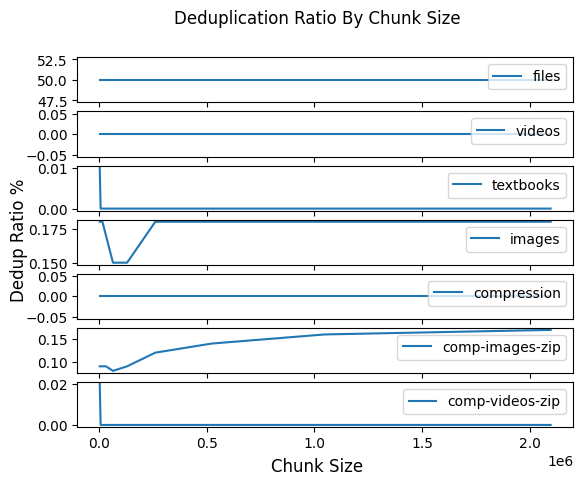

In [71]:
fig, axs = plt.subplots(len(folders))
xs = tests.keys()
for idx, c in enumerate(a.T):
    axs[idx].plot(xs, c, label=folders[idx])
    axs[idx].legend(loc='upper right')
    #axs[idx].set_xlabel("Chunk Size")
    #axs[idx].set_ylabel("Dedup Ratio")
    
fig.suptitle('Deduplication Ratio By Chunk Size')
fig.supxlabel('Chunk Size')
fig.supylabel('Dedup Ratio %')
plt.show()

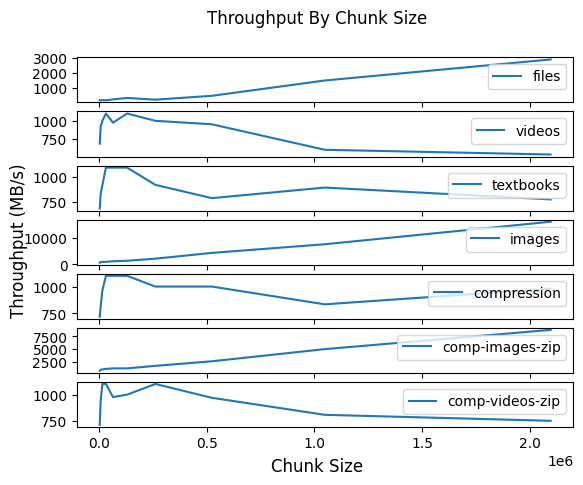

In [72]:
fig, axs = plt.subplots(len(folders))
xs = tests.keys()
for idx, c in enumerate(b.T):
    axs[idx].plot(xs, c, label=folders[idx])
    axs[idx].legend(loc='upper right')
    #axs[idx].set_xlabel("Chunk Size")
    #axs[idx].set_ylabel("Dedup Ratio")
    
fig.suptitle('Throughput By Chunk Size')
fig.supxlabel('Chunk Size')
fig.supylabel('Throughput (MB/s)')
plt.show()